In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

### Section 1: Predator-Prey Interactions

$Code Explanation$: 
* The function above computes the generalized Lotke-Volterra Model for the predator-prey model. The function creates a list of differential equations and uses the solve_ivp() function from SciPy to solve the differential equations. Using the alhpa matrix and mu array, this function solves the differential equation. In the second cell, the population densities, mu array, and alpha matrix are initialized and the graphs are created. 

$Results Explanation:$ 
* This code block was taken directly from Notebook 11 and illustrates predator-prey interactions when no virus is present. The predator and prey population densities oscillate. Once the prey popoulation increases, the predator population increases shortly after due to an increase in food supply. The predators eating the prey cause the prey population to decrease, leading to a decrease in the predator population as well. Eventually, the prey population increases again since it is not being eaten and the cycle repeats itself. This pattern is demonstrated by the cyclical and circcular dynamics pictured on the right. 

In [2]:
def gLV_predator_prey(t,y,n,mu,alpha):
    '''
    This function is taken from notebook 11 and creates the differential equaiton for the generalized Lotke-Volterra model.
    '''
    #y = species (n total)
    dydt = np.zeros(n)
    
    for i in range(n):
        s = 0 #sum
        for j in range(n):
            s = s + alpha[i,j]*y[j]
        
        dydt[i] = y[i]*(mu[i]+s)

    return dydt

Text(0.5, 0.98, 'Figure 1: Predator-Prey Interactions Simulated Using the LV Model')

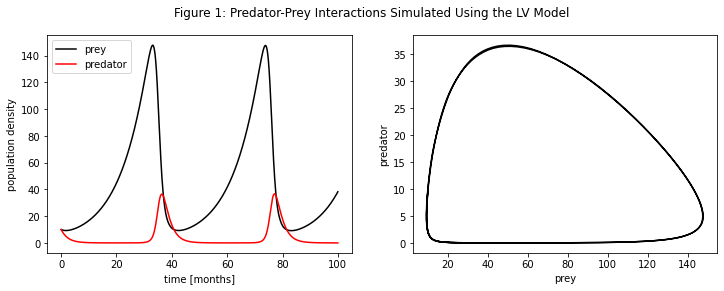

In [3]:
'''
This cell is taken directly from Notebook 11 and uses the function above to create visualizations of the predator-prey population densities under the Lotke Volterra model. 
'''

n = 2
a = 0.1
b = 0.02
c = 0.5
d = 0.01

mu_pp = np.array([a,-c])
alpha_pp = np.array([[0, -b],[d, 0]])

# Initial Conditions
y0 = [10,10]
# time span
t = np.linspace(0,100,1000)
tspan = [t[0],t[-1]]
# numerical integration
ode_sol_pp = solve_ivp(gLV_predator_prey,tspan,y0, t_eval=t, args=(n,mu_pp,alpha_pp))

# plot dynamics
[fig,axs] = plt.subplots(1,2,figsize=[12,4])
axs[0].plot(ode_sol_pp.t,ode_sol_pp.y[0],'k-')
axs[0].plot(ode_sol_pp.t,ode_sol_pp.y[1],'r-')
axs[0].set_xlabel('time [months]')
axs[0].set_ylabel('population density')
axs[0].legend(['prey','predator'])

axs[1].plot(ode_sol_pp.y[0],ode_sol_pp.y[1],'k-');
axs[1].set_xlabel('prey')
axs[1].set_ylabel('predator');
fig.suptitle("Figure 1: Predator-Prey Interactions Simulated Using the LV Model")

### Section 2: The Predator-Prey Model with a Virus
$Code Explanation$: 
* The function above solves the differential equations for a model with a predator, prey and virus. The virus infects/kills both the predator and prey at the same rate. The initial population densities are the predator and prey at 1, and the virus at 10. Using the function gLV_dynamics_virus(), the differential equation for a model where a virus impacts both the predator and prey is solved. The dynamics are then plotted on the graphs above. 

$Results Explanation:$ 
* This code block was used to create a visualization of the dynamics that occur when using the LV model to simulate interactions between a predator, prey, and virus. Given the timing of the oscillations between the predator and virus, the virus immediately kills off the predator population. This causes the prey population to rise and the model shows the same interactions between the virus and prey as the predator-prey model above. Interestingly, the predator population is immediately killed by the virus due to the fact there is significantly more virus than predators in the first time steps of the simulation. This results in the dynamics shown on the right. The predator/prey interactions show that the predator decreases and the prey population density then oscillates between 0 and 10. Simlarly, when the virus has a high initial population density, the preadtor decreases immediately and the virus population density then oscillates between 0 and 10. The prey and virus population dynamics look nearly identical to the predator-prey dynamics pictured in the previous section. This is because the virus has the same effect on the prey as the predator in the previous section. In a sense, the virus becomes a new "predator" for the prey resulting in nearly identical dynamics. The only difference between the dynamics between the predator-prey populations depicted in the previous section and the virus-prey populations depicted above is the scale of the population densities. This difference arises due to different alpha matrices. 

In [4]:
def gLV_dynamics_virus(t,x, a, b, c, d, v1, v2, v3, v4 ,v5, mu, typ):
    '''
    This function creates the differential equations for the LV model with a virus and takes in the values within the alpha matrices for the virus as well as the time span and 
    initial conditions.
    '''
    for i in range(0, len(x)):
        if x[i] <= 0:
            x[i] = 0
    
    dx1dt = x[0] * mu[0] + x[0] * (-b*x[1] - v2*x[2])
    dx2dt = x[1] * mu[1] + x[1] *(d*x[0] - v3*x[2])
    
    if typ == 'pred-prey-seasonal':
        mu[2] =  3 * (np.sin(t - 20) - 1)
    elif typ == 'pred-prey-noshift':
        mu[2] = 3 * (np.sin(t) - 1)
    else: 
        mu[2] = -v1
    
    dx3dt = x[2] * mu[2] + x[2] * (v4*x[0] + v5*x[1])
    
    #y = species (n total)
    dxdt = np.array([dx1dt, dx2dt, dx3dt])

    return dxdt

Text(0.5, 0.98, 'Figure 2: Simulation of Predator-Prey Dynamics with a Virus Using the LV Model ')

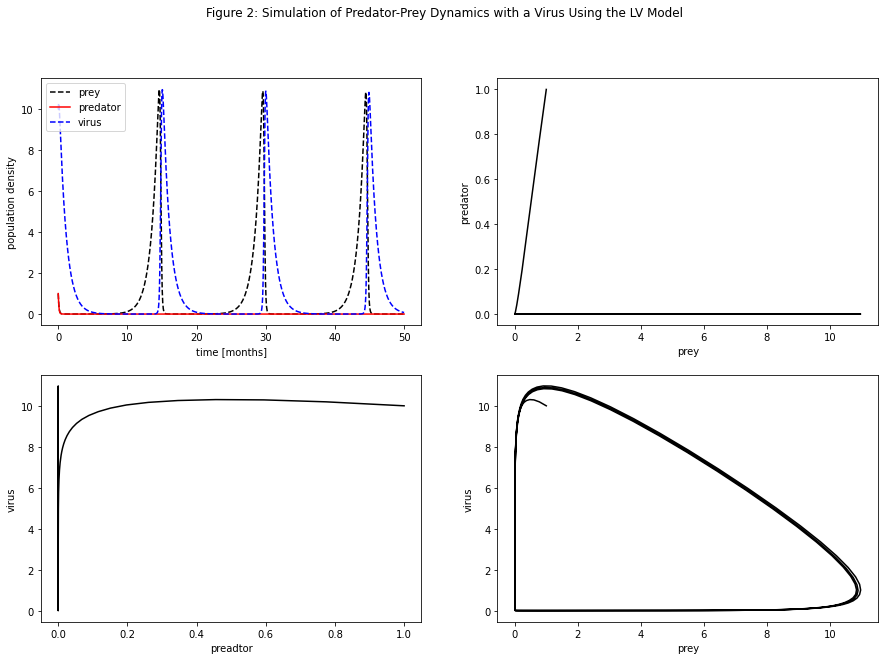

In [5]:
#set the initial population densities
x1 = 1
x2 = 1
x3 = 10

#set the growth rates to be stored in the mu matrix
a = 1
c = 1
v1 = 1

#set the different variables and how they will effect each other - all 1 indicate that the predator, prey and virus all impact eachother at the same rate
b = 1
v2 = 1
d = 1
v3 = 1
v4 = 1
v5 = 1

#create a mu array and alpha matrix for the virus 
mu_virus = np.array([a,-c, -v1])
alpha_virus = np.array([[0, -b, -v2], [d, 0, -v3], [v4, v5, 0]])

#initial conditions
x0 = [x1, x2, x3]
# time span
t = np.linspace(0,50,2000)

tspan = [t[0],t[-1]] 

#pass in the type of virus (whether it is seasonal or not) and solve differential eq
typ = "pred-prey-virus"
ode_sol_virus = solve_ivp(gLV_dynamics_virus,tspan, x0, t_eval=t, args=(a,b,c, d, v1, v2, v3, v4, v5, mu_virus, typ))


# plot dynamics
[fig,axs] = plt.subplots(2,2,figsize=[15,10])
axs[0,0].plot(ode_sol_virus.t,ode_sol_virus.y[0],'k--')
axs[0,0].plot(ode_sol_virus.t,ode_sol_virus.y[1],'r-')
axs[0,0].plot(ode_sol_virus.t,ode_sol_virus.y[2],'b--')
axs[0,0].set_xlabel('time [months]')
axs[0,0].set_ylabel('population density')
axs[0,0].legend(['prey','predator', 'virus'])

axs[0,1].plot(ode_sol_virus.y[0],ode_sol_virus.y[1],'k-');
axs[0,1].set_xlabel('prey')
axs[0,1].set_ylabel('predator');

axs[1,0].plot(ode_sol_virus.y[1],ode_sol_virus.y[2],'k-');
axs[1,0].set_xlabel('preadtor')
axs[1,0].set_ylabel('virus');

axs[1,1].plot(ode_sol_virus.y[0],ode_sol_virus.y[2],'k-');
axs[1,1].set_xlabel('prey')
axs[1,1].set_ylabel('virus');
fig.suptitle("Figure 2: Simulation of Predator-Prey Dynamics with a Virus Using the LV Model ")

### Section 3: The Predator-Prey Model with a Seasonal Virus
$Code Explanation$: 
* The code below initializes the population densities, mu arrays, and alpha matrix for a seasonal virus. In this simulation, the virus infects and kills the predator at a slightly lower rate than it does the prey. This allows for a better visualization of the dynamics between the three species and prevents the predator from being killed off immediately. The growth rate of the seasonal virus is represented by a sine wave instead of a scalar value. This sine wave has an amplitude of 3 and was shifted by 20 months. This shift aligned sine wave of the virus with peaks in the predator-prey oscillations. Without this alignment, the virus is immediately killed because the predator and prey population densities were so low that there was no viable host for the virus and the dynamics simulated were nearly identical to the normal predator-prey models demonstrated in the first section. The graphs of these dynamics are represented in Figure 3. 

$Results Explanation:$ 
* Figure 3
    * The dynamics displayed when the virus started at a high population density and there were limited predators and prey, were nearly identical to that of the normal predator-prey model without a virus. This is because if the oscillations of the predator/prey did not align with that of the virus, the virus did not have a host and died off within the first few months of the simulation, so, the only species left were the predator and prey. While this figure demonstrated the death of the virus without a host, it did not provide valuable insight into the impacts of a seasonal virus on the population densities of predators and prey. To visualize the effects of a seasonal virus on the predator-prey model, we had to shift the sine wave representing the growth of the virus to align with the oscillations in the predator/prey population densities. This allowed us to see how the virus would impact the population densities of predators and prey if the virus had viable hosts during the first months of the simulation. 
    
* Figure 4
    * The dynamics displayed in Figure 4 show the effects of a seasonal virus on the predator-prey model when the virus has a host and does not immediately die off. In this model, the virus infects and kills the predator at a slightly lower rate than it does the prey. This allowed for a better visualization of the dynamics. When the virus killed off the predator and prey at the same rate, the predator popultion density would decrease immediately due to the virus killing a majority of the predators quickly and dynamics similar to those of Figure 3 would arise. The positive impact of the predator and prey on the virus population was also increased to prevent the virus from dying off quickly and demonstrate the impacts of a virus on both the predator and prey. These changes allowed for a more accurate visualization of predator-prey dynamics when a seasonal virus was introduced. In Figure 4, all of the species had oscillations in their population densities. The virus originally killed the predator, causing the prey population to increase. This caused the predator population density to increase due to a larger food source and inversely decreased the prey population density. When the predator and prey were at the highest point within a given period, the virus population density began to increase due to more hosts being present. Once the virus infected both the predator and prey, all species populations decreased. Interestingly, with every oscillation, the population density of all species increased. Once the virus population density was significantly larger than the predator/prey population density (around 40 months), everything died off. This is because the virus killed the predator and prey, and when there were no longer any viable hosts for the virus, the virus died as well. 


Text(0.5, 0.98, 'Figure 3: Simulation of the LV Predator-Prey Model with a Seasonal Virus without a Host')

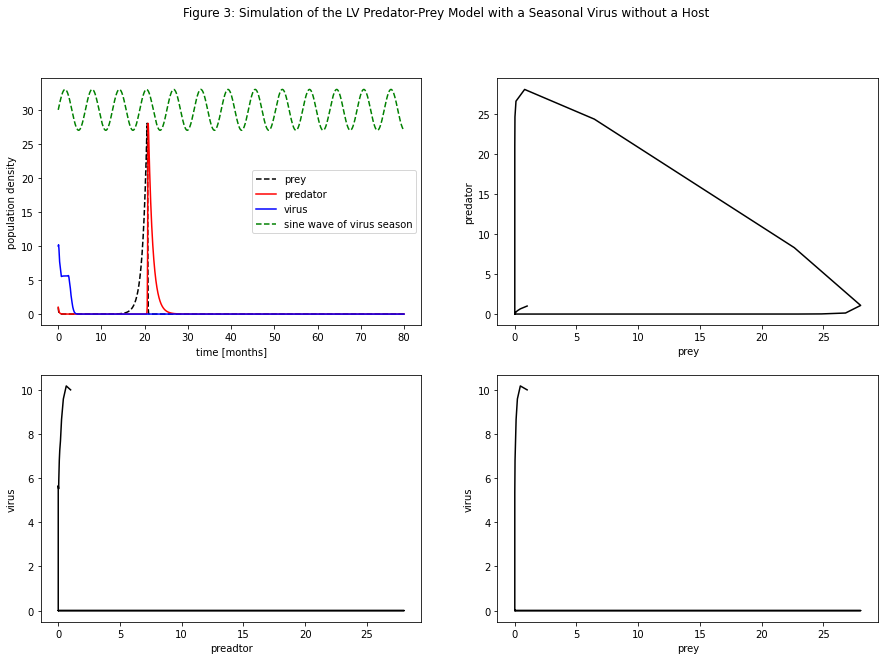

In [6]:
#set the initial population densities
x1 = 1
x2 = 1
x3 = 10

#set the growth rates to be stored in the mu matrix
a = 1
c = 1
v1 = 1

#set the different variables and how they will effect each other - all 1 indicate that the predator, prey and virus all impact eachother at the same rate
b = 1
v2 = 1
d = 1
v3 = 0.5
v4 = 1.5
v5 = 1.5

#initialize time span and create a type so the function knows to use a sine wave
t = np.linspace(0,80,1000)
tspan = [t[0],t[-1]] 
typ = 'pred-prey-noshift'

#create alpha matrix
alpha_seasonal = np.array([[0, -b, -v2], [d, 0, -v3], [v4, v5, 0]])

#solve differential equation
ode_sol_virus_seasonal = solve_ivp(gLV_dynamics_virus,tspan, x0, t_eval=t, args=(a,b,c, d, v1, v2, v3, v4, v5, mu_virus, typ))

# plot dynamics
[fig,axs] = plt.subplots(2,2,figsize=[15,10])
axs[0,0].plot(ode_sol_virus_seasonal.t,ode_sol_virus_seasonal.y[0],'k--')
axs[0,0].plot(ode_sol_virus_seasonal.t,ode_sol_virus_seasonal.y[1],'r-')
axs[0,0].plot(ode_sol_virus_seasonal.t,ode_sol_virus_seasonal.y[2],'b-')
axs[0,0].plot(t,3 * (np.sin(t) + 10 ), 'g--' )
axs[0,0].set_xlabel('time [months]')
axs[0,0].set_ylabel('population density')
axs[0,0].legend(['prey','predator', 'virus', 'sine wave of virus season'])

axs[0,1].plot(ode_sol_virus_seasonal.y[0],ode_sol_virus_seasonal.y[1],'k-');
axs[0,1].set_xlabel('prey')
axs[0,1].set_ylabel('predator');

axs[1,0].plot(ode_sol_virus_seasonal.y[1],ode_sol_virus_seasonal.y[2],'k-');
axs[1,0].set_xlabel('preadtor')
axs[1,0].set_ylabel('virus');

axs[1,1].plot(ode_sol_virus_seasonal.y[0],ode_sol_virus_seasonal.y[2],'k-');
axs[1,1].set_xlabel('prey')
axs[1,1].set_ylabel('virus');

fig.suptitle("Figure 3: Simulation of the LV Predator-Prey Model with a Seasonal Virus without a Host")

Text(0.5, 0.98, 'Figure 4: Simulation of the LV Predator-Prey Model with a Seasonal Virus with a Host')

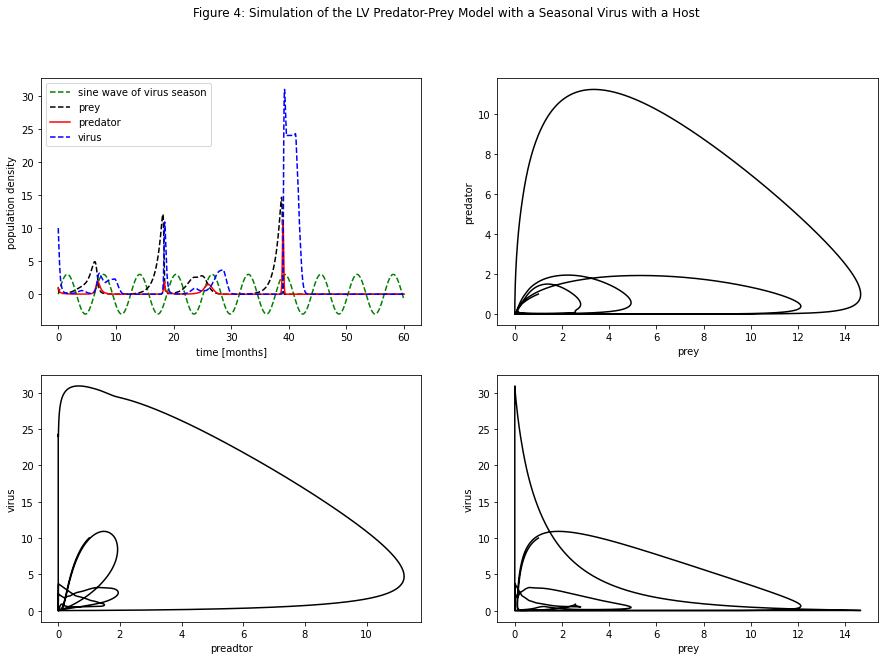

In [7]:
#set the initial population densities
x1 = 1
x2 = 1
x3 = 10

#set the growth rates to be stored in the mu matrix
a = 1
c = 1
v1 = 1

#set the different variables and how they will effect each other - all 1 indicate that the predator, prey and virus all impact eachother at the same rate
b = 1
v2 = 1
d = 1
v3 = 0.5
v4 = 1.5
v5 = 1.5

#initialize time span and create a type so the function knows to use a sine wave
t = np.linspace(0,60,100000)
tspan = [t[0],t[-1]] 
typ = 'pred-prey-seasonal'

#create alpha matrix
alpha_seasonal = np.array([[0, -b, -v2], [d, 0, -v3], [v4, v5, 0]])

#solve differential equation
ode_sol_virus_seasonal = solve_ivp(gLV_dynamics_virus,tspan, x0, t_eval=t, args=(a,b,c, d, v1, v2, v3, v4, v5, mu_virus, typ))

# plot dynamics
[fig,axs] = plt.subplots(2,2,figsize=[15,10])
axs[0,0].plot(t,3 * (np.sin(t) ), 'g--' )
axs[0,0].plot(ode_sol_virus_seasonal.t,ode_sol_virus_seasonal.y[0],'k--')
axs[0,0].plot(ode_sol_virus_seasonal.t,ode_sol_virus_seasonal.y[1],'r-')
axs[0,0].plot(ode_sol_virus_seasonal.t,ode_sol_virus_seasonal.y[2],'b--')
axs[0,0].set_xlabel('time [months]')
axs[0,0].set_ylabel('population density')
axs[0,0].legend([ 'sine wave of virus season', 'prey','predator', 'virus'])

axs[0,1].plot(ode_sol_virus_seasonal.y[0],ode_sol_virus_seasonal.y[1],'k-');
axs[0,1].set_xlabel('prey')
axs[0,1].set_ylabel('predator');

axs[1,0].plot(ode_sol_virus_seasonal.y[1],ode_sol_virus_seasonal.y[2],'k-');
axs[1,0].set_xlabel('preadtor')
axs[1,0].set_ylabel('virus');

axs[1,1].plot(ode_sol_virus_seasonal.y[0],ode_sol_virus_seasonal.y[2],'k-');
axs[1,1].set_xlabel('prey')
axs[1,1].set_ylabel('virus');

fig.suptitle("Figure 4: Simulation of the LV Predator-Prey Model with a Seasonal Virus with a Host")

### Section 4: Alpha Matrices Graphed
$Code Explanation$: 
* The code below plots the alpha matrices in a color map for the predator-prey LV model with a virus and a seasonal virus.

$Results Explanation:$ 
* The matrices demonstrate the pairwise interactions between the three species in both models. The values in the alpha matrices were arbitrarily chosen through trial and error to accurately demonstrate the dynamics of a predator-prey model when a virus and seasonal virus are added. 
    * The non-seasonal matrix on the left demonstrates the negative impact the virus has on both the predator and prey population densities as well as the negative impact the predator has on the prey population density. It also shows the positive impact that the prey has on the predator population density as well as the positive impact the predator and prey have on the virus population density. The magnitude of these impacts are all 1. This means that the magnitude of the changes that each species will have on the other are equal. 
    * The seasonal matrix on the right shows the same dynamics except the magnitude in which the virus benefits or grows from the predator/prey is greater than that of the non-seasonal matrix. This is because at a lower magnitude (like the other matrix), the virus was immediately dying off from a lack of host, causing normal prey-predator dynamics to simulated as they were in Section 1. To combat this, we decided to increase the positive impact of the hosts on the virus. A similar result was also shown when we increased the initial population densities of the predator and prey. We also decreased the negative impact of the virus on the predator population density. This prevented the virus from automatically killing off all the predators which was already simulated Section 3. These changes to the seasonal virus alpha matrix allowed for a new visualization that was not seen in previous sections. This alpha matrix was used to create Figure 4 which aligned the oscillation in the predator population density to that of the virus density. 

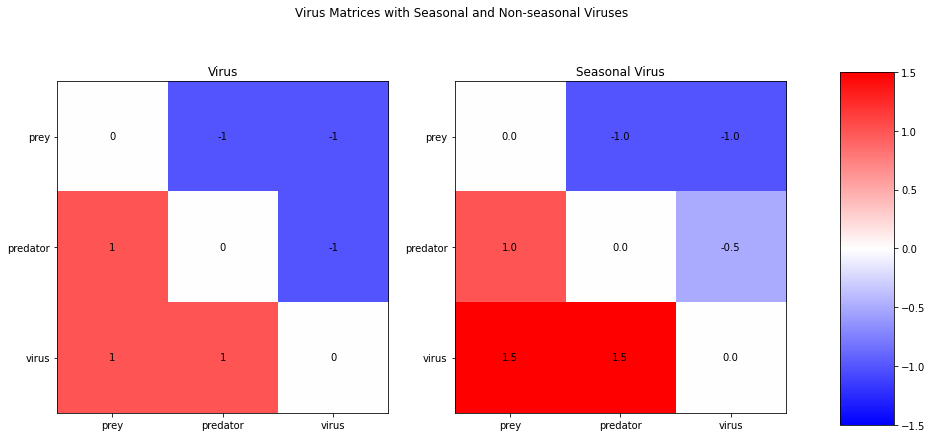

In [8]:

#create axes
[fig,axs] = plt.subplots(1,2,figsize=[15,7])

#get min and max vals
minval = np.min([alpha_virus,alpha_seasonal]) - 0.5 #shift so the "middle point" of 0 is white
maxval = np.max([alpha_virus,alpha_seasonal]) 

#plot the color map
axs[0].imshow(alpha_virus,cmap="bwr", vmin=minval, vmax=maxval)
axs[0].set_title('Virus')
axs[0].set_xticks(range(3))
axs[0].set_xticklabels(['prey', 'predator', 'virus'])
axs[0].set_yticks(range(3))
axs[0].set_yticklabels(['prey', 'predator', 'virus'])
#put the numbers in the boxes
for i in range(0,3):
    for j in range(0,3):
        axs[0].text(j, i, f"{alpha_virus[i,j]}", ha = "center", va = "center", color = "black")

#plot the color map
axs[1].imshow(alpha_seasonal,cmap="bwr", vmin=minval, vmax=maxval)
axs[1].set_title('Seasonal Virus')
axs[1].set_xticks(range(3))
axs[1].set_xticklabels(['prey', 'predator', 'virus'])
axs[1].set_yticks(range(3))
axs[1].set_yticklabels(['prey', 'predator', 'virus'])
#put the numbers in the boxes
for i in range(0,3):
    for j in range(0,3):
        axs[1].text(j, i, f"{alpha_seasonal[i,j]}", ha = "center", va = "center", color = "black")
        
#annotate the plot 
fig.suptitle("Virus Matrices with Seasonal and Non-seasonal Viruses")
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
im=axs[0].imshow(alpha_virus,cmap="bwr", vmin=minval, vmax=maxval)
fig.subplots_adjust(right=0.8)
fig.colorbar(im, cax=cbar_ax)
